# MODUL 3 : TRANSFORMASI WAVELET


Code dibawah merupakan beberapa library yang digunakan untuk melakukan import module. Import module ini berfungsi untuk menspesifikasikan module dari beberapa (library) yang digunakan dan 'as' digunakan sebagai penamaan alias pada module agar lebih mudah untuk melakukan import module.

In [37]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Grayscale

Code dibawah berfungsi untuk membaca sebuah gambar dengan nama file 'IoriYagami.jpg' menggunakan library OpenCV dan menyimpannya dalam variabel 'img'. Gambar tersebut memiliki mode warna grayscale (0). Selanjutnya, gambar tersebut ditampilkan menggunakan fungsi imshow dari library matplotlib. Parameter cmap='gray' digunakan untuk menampilkan gambar dalam skala abu-abu (grayscale).

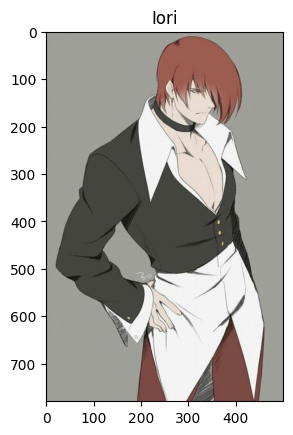

In [41]:
image = plt.imread("image/IoriYagami.jpg")

plt.title("Iori")
plt.imshow(image,cmap="gray")



Citra "IoriYagami.jpg" dibaca menggunakan fungsi plt.imread() dari library matplotlib yang akan menghasilkan representasi citra dalam bentuk array numpy. Setelah dibaca, citra tersebut diubah menjadi citra grayscale menggunakan fungsi cv.cvtColor. kemudian, ditampilkan menggunakan fungsi plt.imshow() yang juga berasal dari library Matplotlib.

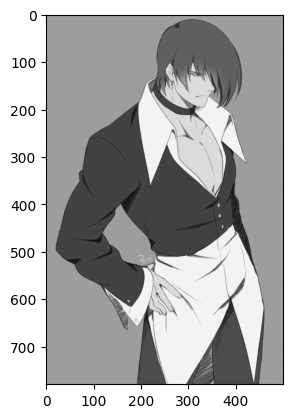

In [44]:
grayImage = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.imshow(grayImage, cmap="gray")

Menyiapkan fungsi yang akan digunbakan

In [45]:
def dekomposisi(abu, lowPassFilter, highPassFilter):
    if abu.shape[0] % 2 != 0:
        abu = abu[:-1, :]
    if abu.shape[1] % 2 != 0:
        abu = abu[:, :-1]

    newl = np.zeros((abu.shape[0], abu.shape[1]//2), dtype=float)
    newh = np.zeros((abu.shape[0], abu.shape[1]//2), dtype=float)
    newll = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
    newlh = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
    newhl = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
    newhh = np.zeros((newl.shape[0]//2, newl.shape[1]), dtype=float)
    
    for i in range(0, abu.shape[0], 1):
        for j in range(0, abu.shape[1], 2):
            newl[i, j//2] = (abu[i, j]*lowPassFilter[0]+abu[i, j+1]*lowPassFilter[1])/2
            newh[i, j//2] = (abu[i, j]*highPassFilter[0]+abu[i, j+1]*highPassFilter[1])/2

    for i in range(0, newl.shape[0], 2):
        for j in range(0, newl.shape[1], 1):
            newll[i//2, j] = (newl[i, j]*lowPassFilter[0]+newl[i+1, j]*lowPassFilter[1])/2
            newlh[i//2, j] = (newl[i, j]*highPassFilter[0]+newl[i+1, j]*highPassFilter[1])/2
            newhl[i//2, j] = (newh[i, j]*lowPassFilter[0]+newh[i+1, j]*lowPassFilter[1])/2
            newhh[i//2, j] = (newh[i, j]*highPassFilter[0]+newh[i+1, j]*highPassFilter[1])/2
    
    return newll, newlh, newhl, newhh

def normalisasi(img):
    imgNormalisasi = (img - np.min(img)) / (np.max(img) - np.min(img))
    return imgNormalisasi

def merge(newll, newlh, newhl, newhh):
    (height, width) = newll.shape[:2]
    result = np.zeros((height*2, width*2))
    for i in range(height):
        for j in range(width):
            result[i,j] = newll[i,j]
            result[i+height, j] = newhl[i, j]
            result[i, j+width] = newlh[i, j]
            result[i+height, j+width] = newhh[i, j]
    
    return result

Fungsi 'dekomposisi' digunakan untuk melakukan proses dekomposisi citra menggunakan transformasi wavelet. Fungsi ini terlebih dahulu akan memastikan dimensi baris dan kolom gambar masukan bernilai genap agar dapat dibagi menjadi blok-blok kecil yang seragam. Kemudian, gambar akan dibagi menjadi empat sub-citra yakni LL, LH, HL, dan HH melalui proses konvolusi dengan menggunakan filter low pass dan high pass. Hasilnya berupa koefisien-koefisien wavelet yang merepresentasikan ciri-ciri gambar pada rentang frekuensi tertentu.

Fungsi 'normalisasi' digunakan untuk menormalisasi nilai piksel gambar hasil dekomposisi menjadi skala 0-1. Fungsi ini menghitung nilai minimum dan maksimum piksel gambar, kemudian mengurangkan nilai minimum dari setiap piksel dan membaginya dengan selisih antara maksimum dan minimum.

Fungsi 'merge' digunakan untuk menyusun kembali koefisien-koefisien sub-citra yang dihasilkan fungsi dekomposisi menjadi satu citra hasil. Fungsi ini menempatkan kembali masing-masing koefisien sub-citra pada kuadran yang sesuai di dalam citra hasil sehingga struktur citra awal diperoleh kembali.

# Mendefinisikan Low Pass Filter dan High Pass Filter

In [46]:
lowPassFilter = np.array([0.7, 0.7])
highPassFilter = np.array([-0.7, 0.7])

Baris kode di atas merupakan inisialisasi filter rendah dengan koefisien [0.7, 0.7] dan filter tinggi dengan koefisien [-0.7, 0.7]. Nilai ini digunakan dalam transformasi wavelet untuk mengekstraksi frekuensi rendah dan tinggi dari sinyal.

# Melakukan Proses Dekomposisi dan Menampilkan Citra Hasil Dekomposisi Setelah Normalisasi

Code tersebut melakukan transformasi wavelet pada gambar grayscale dengan melakukan dekomposisi level 1. Proses dekomposisi ini melibatkan penggunaan filter rendah dan filter tinggi. Filter rendah digunakan untuk menangkap detail besar dalam gambar, sementara filter tinggi untuk menangkap detail kecil.

Hasilnya, gambar akan terbagi menjadi empat subband: LL untuk informasi frekuensi rendah, LH untuk detail horizontal frekuensi tinggi, HL untuk detail vertikal frekuensi tinggi, dan HH untuk detail diagonal frekuensi tertinggi.

Setiap subband dinormalisasi untuk mengatur skala nilai pikselnya antara 0 hingga 1. Kemudian, keempat subband tersebut digabungkan kembali menjadi satu gambar menggunakan fungsi merge.

Visualisasi hasil transformasi wavelet ditampilkan dalam 5 subplot yang berbeda. Subplot pertama hingga keempat menampilkan masing-masing subband LL, LH, HL, dan HH, sementara subplot terakhir menampilkan gambar hasil penggabungan keempat subband tersebut. Ini memungkinkan pengamatan distribusi frekuensi pada gambar setelah dekomposisi wavelet dilakukan.

(-0.5, 499.5, 779.5, -0.5)

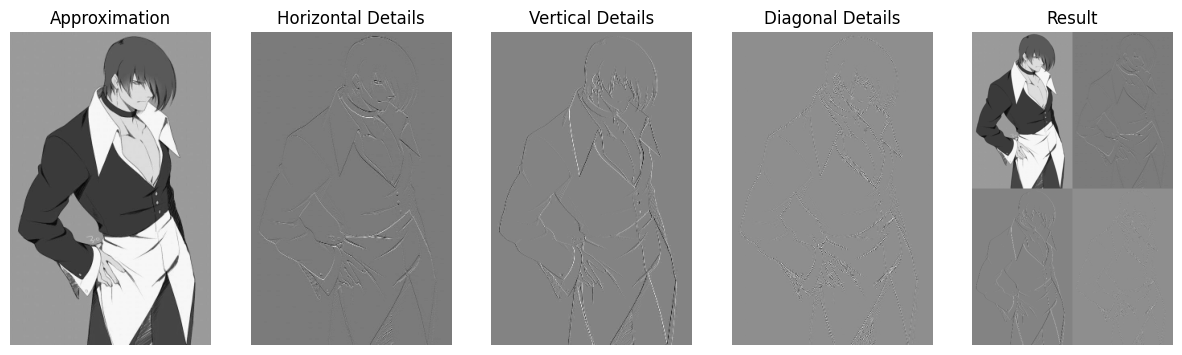

In [47]:
ll, lh, hl, hh = dekomposisi(grayImage, lowPassFilter, highPassFilter)
LL = normalisasi(ll)
LH = normalisasi(lh)
HL = normalisasi(hl)
HH = normalisasi(hh)

gabung = merge(LL, LH, HL, HH)
plt.figure(figsize=(15, 15))
plt.subplot(1, 5, 1)
plt.title('Approximation')
plt.imshow(LL, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.title('Horizontal Details')
plt.imshow(LH, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 3)
plt.title('Vertical Details')
plt.imshow(HL, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.title('Diagonal Details')
plt.imshow(HH, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 5)
plt.title('Result')
plt.imshow(gabung, cmap='gray')
plt.axis('off')

# Menyiapkan fungsi yang akan digunakan

In [49]:
def dilatasi(skala, img):
    height, width = img.shape
    Dilatasi = np.zeros((height*skala, width*skala))
    n = 0
    for i in range(height*skala):
        m = 0
        for j in range(width*skala):
            Dilatasi[i][j] = img[n][m]
            if j % skala == skala-1:
                m += 1
        if i % skala == skala-1:
            n += 1
    return Dilatasi

def merge_combined(lL, lH, hL, hH, levels):
    result = merge(lL, lH, hL, hH)
    for i in range(levels-1):
        lH = dilatasi(2, lH)
        hL = dilatasi(2, hL)
        hH = dilatasi(2, hH)
               
        if i >= 1:
            result = merge(result, lH, hL, hH)
        else:
            result = merge(result, lH, hL, hH)

    return result

Kode ini bertujuan untuk dinamis menampilkan hasil dekomposisi citra pada level yang lebih tinggi dengan mengatasi perbedaan ukuran gambar yang muncul akibat proses dekomposisi wavelet. 

Fungsi 'dilatasi' digunakan untuk memperbesar ukuran gambar hasil dekomposisi wavelet dengan mengalikan setiap nilai piksel dengan faktor skala yang diberikan. Hal ini bermanfaat saat ingin menampilkan hasil dekomposisi pada level tinggi yang umumnya memiliki ukuran kecil, sehingga dengan dilatasi, ukuran gambar dapat disesuaikan untuk tampilan yang lebih baik.

Sementara itu, fungsi 'merge_combined' berperan dalam menggabungkan kembali bagian-bagian hasil transformasi wavelet pada level tertentu setelah dilakukan dilatasi. Dengan demikian, citra dapat direkonstruksi kembali menjadi satu citra gabungan yang mewakili hasil dekomposisi pada level tersebut.

Dengan menggunakan kedua fungsi ini, kode dapat menampilkan hasil dekomposisi wavelet secara dinamis pada level yang lebih tinggi dengan menyesuaikan ukuran gambar untuk mencapai tampilan yang optimal.

# Menampilkan Hasil Dekomposisi Citra Pada Level 3, 4, 5 Dan Seterusnya Secara Dinamis

Code di bawah berfungsi untuk menampilkan hasil dekomposisi secara dinamis hingga berada pada level tertentu

(-0.5, 7999.5, 12479.5, -0.5)

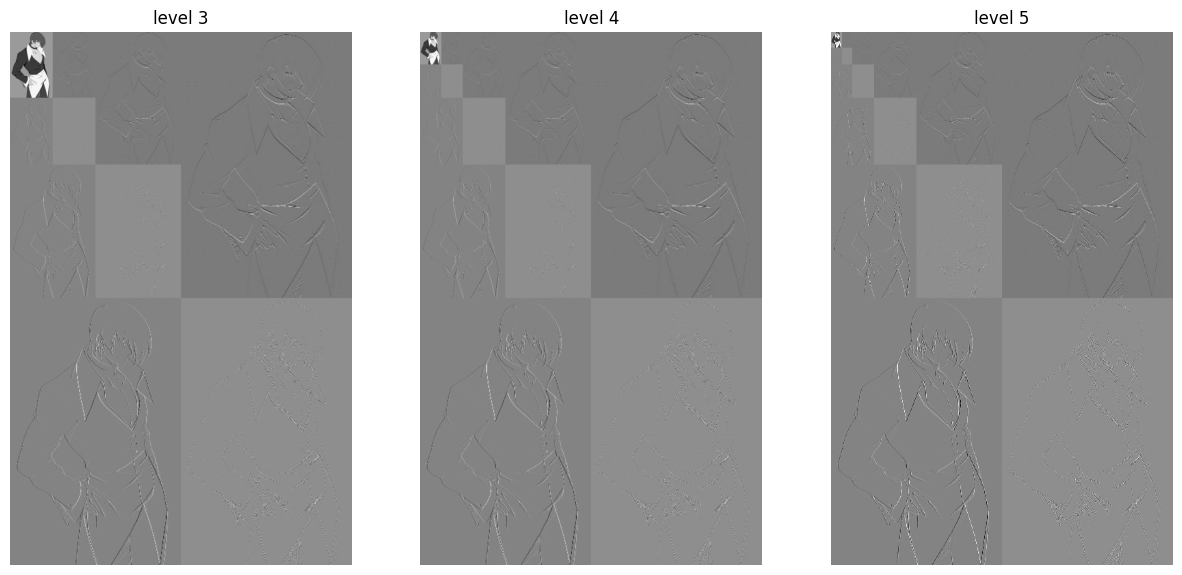

In [50]:
level3 = merge_combined(LL, LH, HL, HH, 3)
level4 = merge_combined(LL, LH, HL, HH, 4)
level5 = merge_combined(LL, LH, HL, HH, 5)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title('level 3')
plt.imshow(level3, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('level 4')
plt.imshow(level4, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('level 5')
plt.imshow(level5, cmap='gray')
plt.axis('off')

# Menyiapkan Fungsi Yang Akan Digunakan

In [51]:
def rekonstruksi(newll, newlh, newhl, newhh):
    height, width = newll.shape
    h = height*2
    w = width*2
    img = np.zeros([h, w])
    ll = dilatasi(2, newll)
    lh = dilatasi(2, newlh)
    hl = dilatasi(2, newhl)
    hh = dilatasi(2, newhh)
    for i in range(h):
        for j in range(w):
            img[i][j] += (ll[i][j]+lh[i][j]+hl[i][j]+hh[i][j])
    return img

Fungsi 'rekonstruksi' melakukan dilatasi pada masing-masing bagian. Setelah itu, citra asli direkonstruksi dengan menjumlahkan setiap piksel pada posisi yang sesuai dari keempat bagian tersebut.

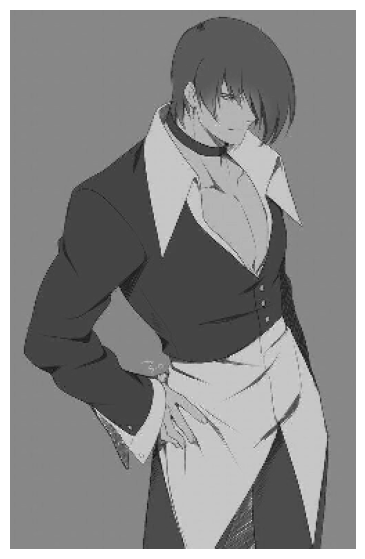

In [52]:
rekonstruksi_Iori = rekonstruksi(LL, LH, HL, HH)
fig = plt.figure(figsize=(10, 7))
plt.axis('off')
plt.imshow(rekonstruksi_Iori, cmap='gray')

# Melakukan Dekomposisi Hingga Terlihat Seperti Di Soal

Setelah menyimpan hasil dekomposisi citra pada level 1 ke dalam variabel 'BaruLL', 'BaruLH', 'BaruHL', dan 'BaruHH', dilakukan iterasi transformasi wavelet pada komponen LL (BaruLL) sebanyak lima kali. 

Pada setiap iterasi, dilakukan transformasi wavelet baru menggunakan filter rendah dan filter tinggi. Setelah lima iterasi selesai, hasil transformasi pada setiap level ditampilkan dalam empat subplot yang berbeda. Subplot pertama menampilkan komponen LL (Approximation), subplot kedua menampilkan komponen LH (Horizontal Details), subplot ketiga menampilkan komponen HL (Vertical Details), dan subplot keempat menampilkan komponen HH (Diagonal Details).

Setiap subplot dilengkapi dengan judul yang sesuai dan menggunakan skala warna abu-abu untuk menampilkan hasil transformasi tersebut.

(-0.5, 6.5, 11.5, -0.5)

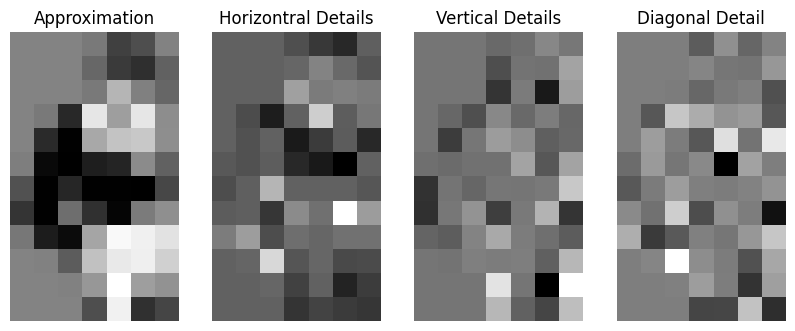

In [53]:
BaruLL, BaruLH, BaruHL, BaruHH = dekomposisi(ioriabu, lowPassFilter, highPassFilter)
BaruLL = normalisasi(BaruLL)
BaruLH = normalisasi(BaruLH)
BaruHL = normalisasi(BaruHL)
BaruHH = normalisasi(BaruHH)

for i in range(5):
    BaruLL, BaruLH, BaruHL, BaruHH = dekomposisi(BaruLL, lowPassFilter, highPassFilter)
    
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 4, 1)
plt.imshow(BaruLL, cmap='gray')
plt.title("Approximation")
plt.axis('off')
fig.add_subplot(1, 4, 2)
plt.imshow(BaruLH, cmap='gray')
plt.title("Horizontral Details")
plt.axis('off')
fig.add_subplot(1, 4, 3)
plt.imshow(BaruHL, cmap='gray')
plt.title("Vertical Details")
plt.axis('off')
fig.add_subplot(1, 4, 4)
plt.imshow(BaruHH, cmap='gray')
plt.title("Diagonal Detail")
plt.axis('off')

# Jawaban dari level Dekomposisi

Dari yang saya coba dekomposisi, yang pertama saya melakukan dekomposisi pertama dengan "BaruLL, BaruLH, BaruHL, BaruHH = dekomposisi(grayimage, lowPassFilter, highPassFilter)", setelah itu saya menambahkan level range sebanyak 5, jadi level dekomposisi yang sesuai dengan di soal adalah dilakukan dekomposisi sebanyak 6 level

# Menyiapkan fungsi yang akan digunakan

In [54]:
def lineSignal(image):
    line = np.zeros((image.shape[0]*image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            line[i*image.shape[1]+j] = image[i][j]

    return line

Code di atas membuat method 'lineSignal' yang berfungsi untuk mengambil gambar sebagai input dan mengembalikan representasi linier dari gambar tersebut. Tahapan proses yang terjadi di fungsi ini yaitu Inisialisasi Array Linear, Mengubah Gambar menjadi Linier, dan Mengembalikan Representasi Linier. Fungsi ini juga berguna untuk mengubah gambar 2D menjadi representasi linier 1D.

# Menampilkan representasi sinyal pada hasil dekomposisi pada nomor 3

Code di bawah berfungsi untuk mengambil yang diperoleh dari dekomposisi wavelet level 6 (BaruLL, BaruLH, BaruHL, BaruHH) dan memvisualisasikannya sebagai sinyal linier. Masing-masing BaruLL, BaruLH, BaruHL, BaruHH diambil dengan slicing ([:12, :7]) untuk menyesuaikan dengan contoh (hanya menampilkan sebagian kecil subband). Kemudian terdapat Fungsi plt.plot yang digunakan untuk memplot sinyal linier yang disimpan dalam HHsignal, HLsignal, LHsignal, dan LLsignal.

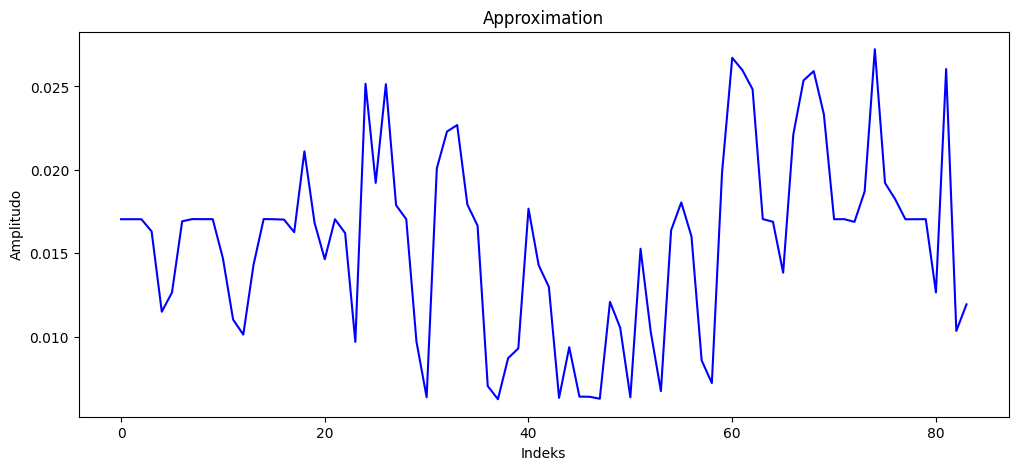

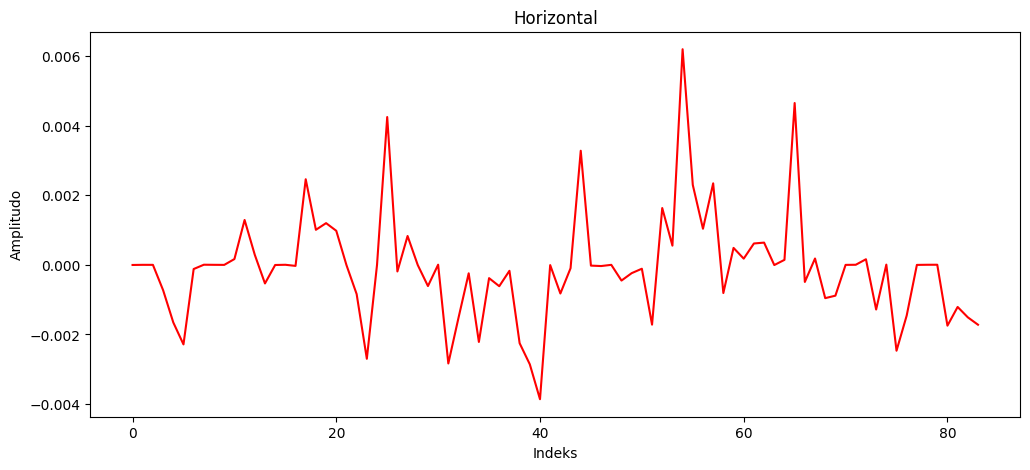

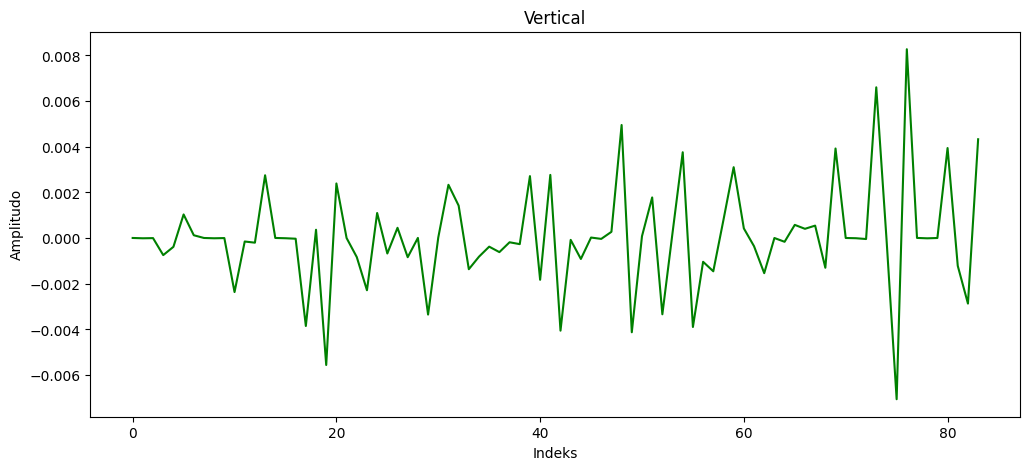

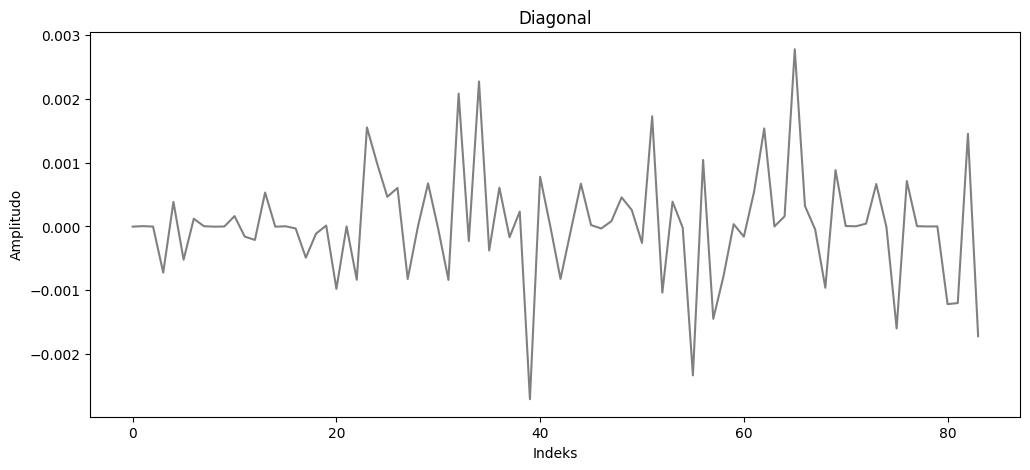

In [55]:
HHsignal = lineSignal(BaruHH[:12, :7])
HLsignal = lineSignal(BaruHL[:12, :7])
LHsignal = lineSignal(BaruLH[:12, :7])
LLsignal = lineSignal(BaruLL[:12, :7])

plt.figure(figsize=(12,5))
plt.plot(LLsignal, color='blue')
plt.title('Approximation')
plt.xlabel('Indeks')
plt.ylabel('Amplitudo')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(LHsignal, color='red')
plt.title('Horizontal')
plt.xlabel('Indeks')
plt.ylabel('Amplitudo')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(HLsignal, color='green')
plt.title('Vertical')
plt.xlabel('Indeks')
plt.ylabel('Amplitudo')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(HHsignal, color='gray')
plt.title('Diagonal')
plt.xlabel('Indeks')
plt.ylabel('Amplitudo')
plt.show()